In [16]:
# Import necessary modules for process mining and visualization using pm4py
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [17]:
# Load an event log in XES format using the xes_importer module from pm4py
log = xes_importer.apply('process_mining_log.xes')

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
# Load a CSV file as a pandas DataFrame, convert timestamp columns to datetime format, and sort the DataFrame by timestamp
df = pd.read_csv('process_mining.csv')
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

# Convert the pandas DataFrame to a pm4py log object using log_converter module
log = log_converter.apply(df)

In [19]:
# sorts the rows of a Pandas DataFrame in ascending order based on two columns
df.sort_values(['case:concept:name', 'time:timestamp']).reset_index(drop=True)

,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
0,register request,50,Pete,1,Fluxicon Nitro,register request,Pete,2010-12-30 10:02:00+00:00
1,examine thoroughly,400,Sue,1,Fluxicon Nitro,examine thoroughly,Sue,2010-12-31 09:06:00+00:00
2,check ticket,100,Mike,1,Fluxicon Nitro,check ticket,Mike,2011-01-05 14:12:00+00:00
3,decide,200,Sara,1,Fluxicon Nitro,decide,Sara,2011-01-06 10:18:00+00:00
4,reject request,200,Pete,1,Fluxicon Nitro,reject request,Pete,2011-01-07 13:24:00+00:00
5,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 10:32:00+00:00
6,check ticket,100,Mike,2,Fluxicon Nitro,check ticket,Mike,2010-12-30 11:12:00+00:00
7,examine casually,400,Sean,2,Fluxicon Nitro,examine casually,Sean,2010-12-30 13:16:00+00:00
8,decide,200,Sara,2,Fluxicon Nitro,decide,Sara,2011-01-05 10:22:00+00:00
9,pay compensation,200,Ellen,2,Fluxicon Nitro,pay compensation,Ellen,2011-01-08 11:05:00+00:00


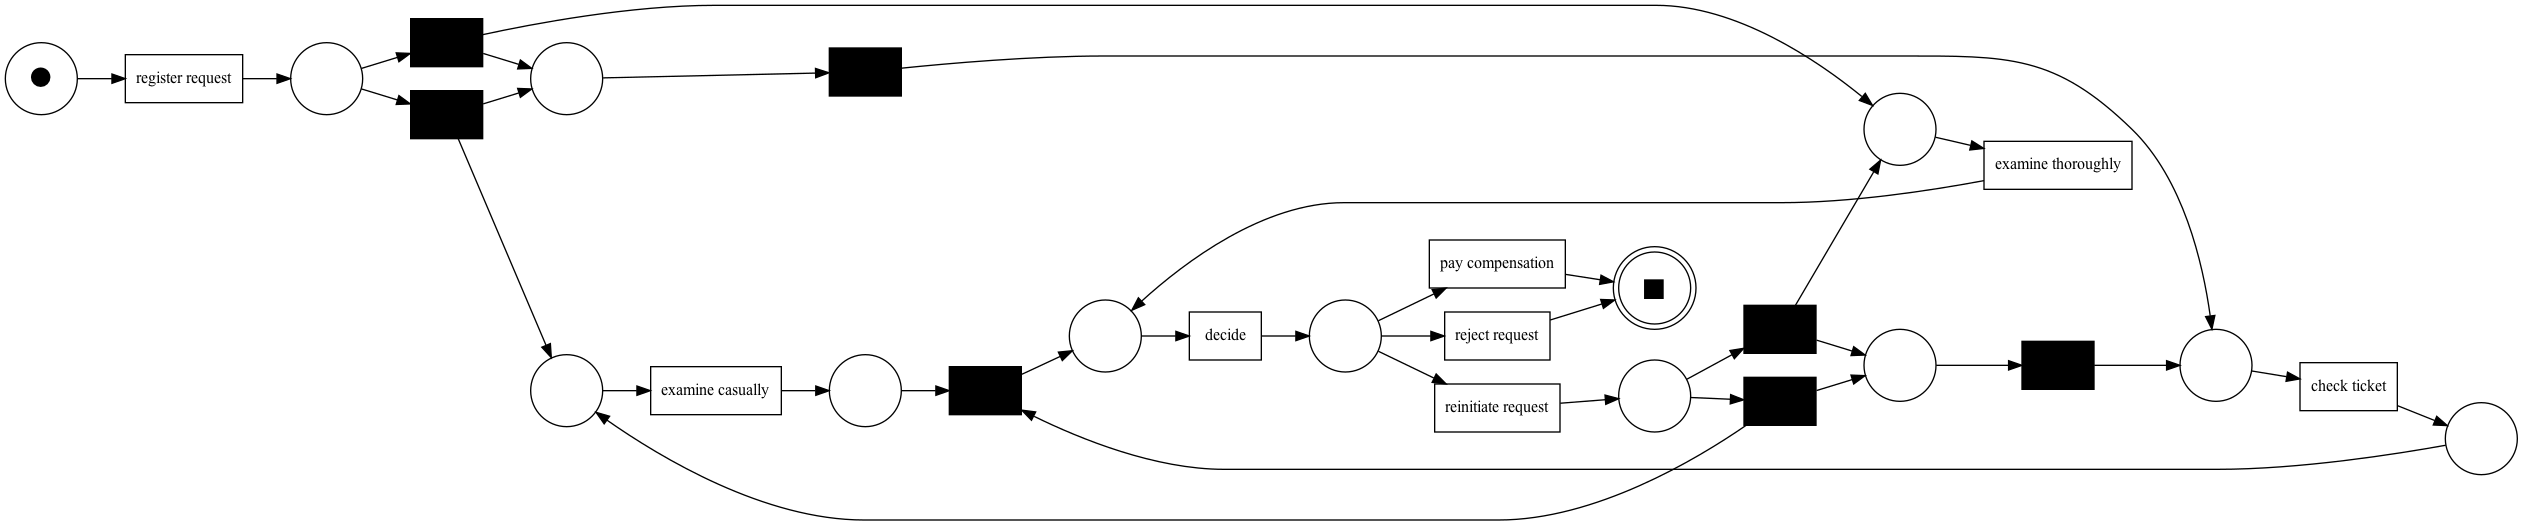

In [20]:
# Apply the heuristics miner algorithm on the log to obtain the Petri net
net, im, fm = heuristics_miner.apply(log)

# Apply the Petri net visualizer on the obtained Petri net, place markings and final markings to obtain the visualization graph
gviz = pn_visualizer.apply(net, im, fm)
# View the obtained Petri net visualization graph
pn_visualizer.view(gviz)